In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
df=pd.read_csv('C:/Users/mezo/Desktop/marketing_sales_data.csv')
df.head(10)


,TV,Radio,Social Media,Influencer,Sales
0,Low,1.218354,1.270444,Micro,90.054222
1,Medium,14.949791,0.274451,Macro,222.741668
2,Low,10.377258,0.061984,Mega,102.774790
3,High,26.469274,7.070945,Micro,328.239378
4,High,36.876302,7.618605,Mega,351.807328
5,High,25.561910,5.459718,Micro,261.966812
6,High,37.263819,6.886535,Nano,349.861575
7,Low,13.187256,2.766352,Macro,140.415286
8,High,29.520170,2.333157,Nano,264.592233
9,Low,3.773287,0.135074,Nano,55.674214


## Initial Data Examination
* The dataset comprises various marketing attributes like TV, Radio, Social Media, and Influencer, and their effect on Sales.
* It was observed that there were missing values which were subsequently dropped.


In [2]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Radio,571.0,18.646472,9.650740,0.194576,10.878554,18.810430,25.838296,48.871161
Social Media,572.0,3.248471,2.195696,0.013230,1.447163,2.945318,4.791290,11.260430
Sales,571.0,193.516937,90.516153,31.199409,118.544562,198.521410,268.567987,358.420739


In [3]:
df.describe(include='object')

,TV,Influencer
count,571,572
unique,3,4
top,Low,Mega
freq,197,148


In [4]:
df.isna().sum()

TV              1
Radio           1
Social Media    0
Influencer      0
Sales           1
dtype: int64

In [6]:
df=df.dropna()

## Data Visualization Insights
* The `TV` attribute majorly has `Low` advertisement levels.
* The most popular influencer type is `Mega`.
* Most sales values fall within the 100 to 300 range.
* The average sales are higher for `High` TV ad levels and `Micro` influencers.


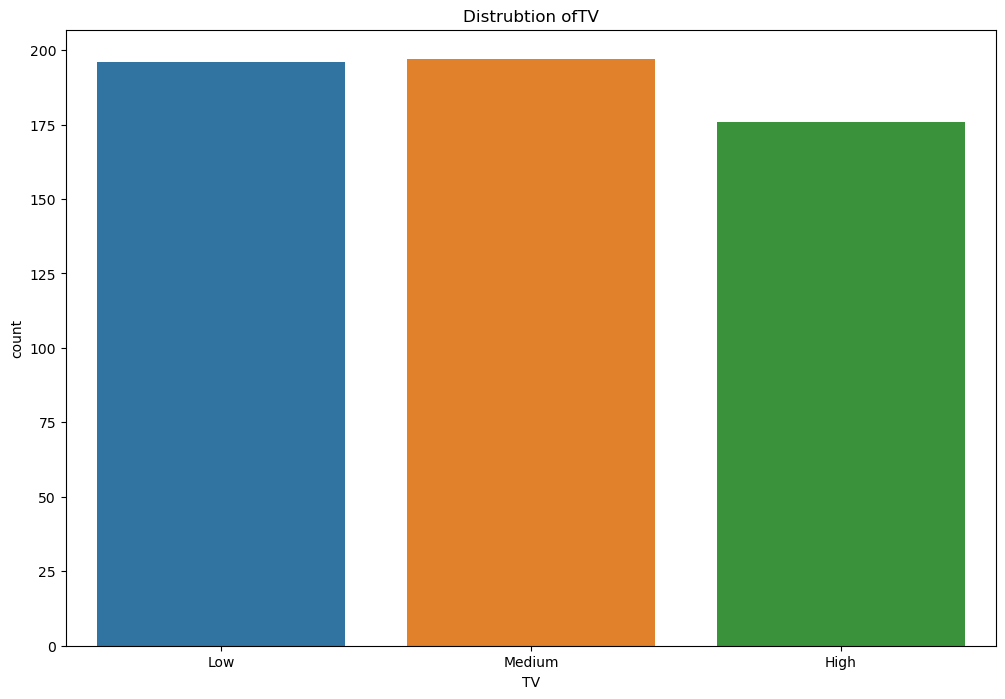

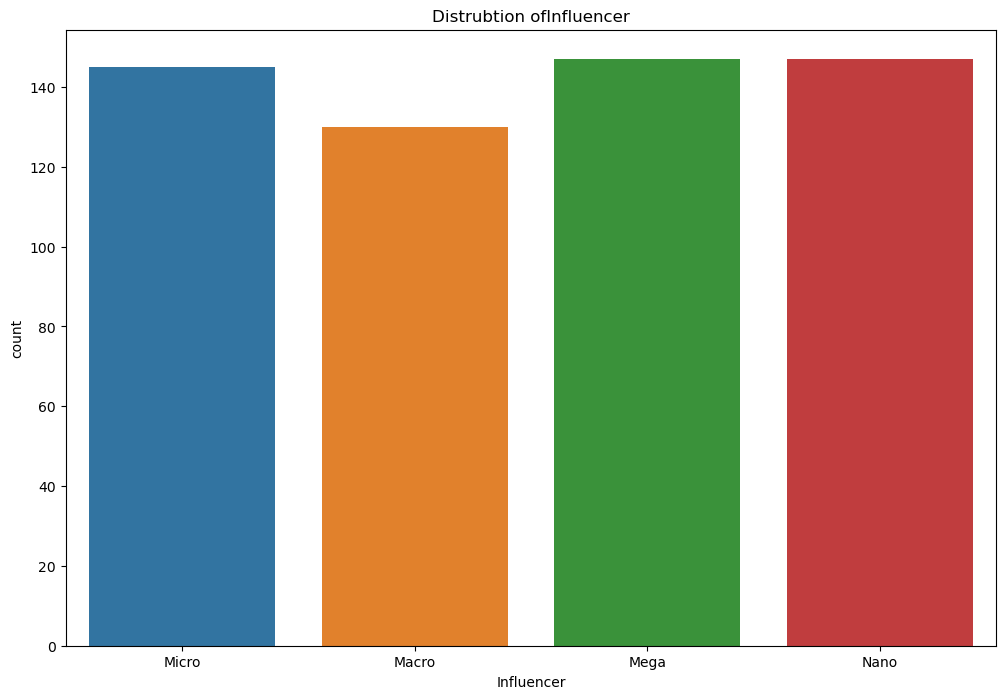

In [7]:
categories=['TV','Influencer']
for category in categories:
    plt.figure(figsize=(12,8))
    sns.countplot(x=category,data=df)
    plt.title(f'Distrubtion of{category}')
    plt.show

<Axes: xlabel='Sales', ylabel='Count'>

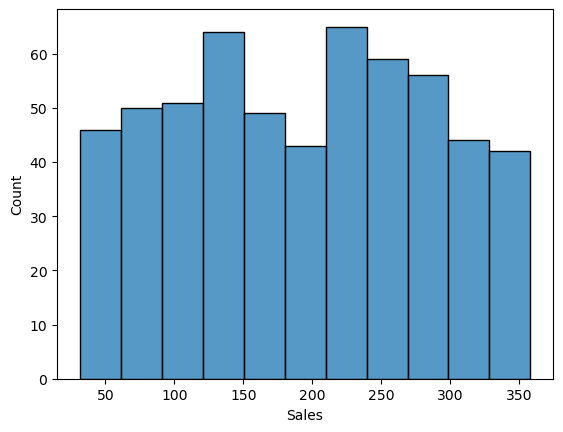

In [8]:
sns.histplot(df['Sales'])

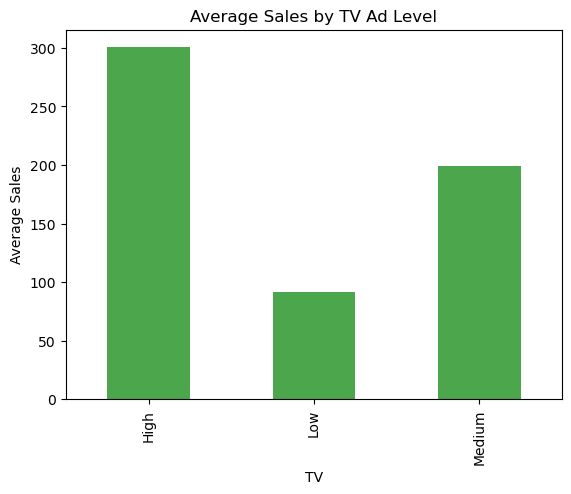

In [9]:
# Sales by TV advertisement level
df.groupby('TV')['Sales'].mean().plot(kind='bar', color='green', alpha=0.7)
plt.title('Average Sales by TV Ad Level')
plt.ylabel('Average Sales')
plt.show()


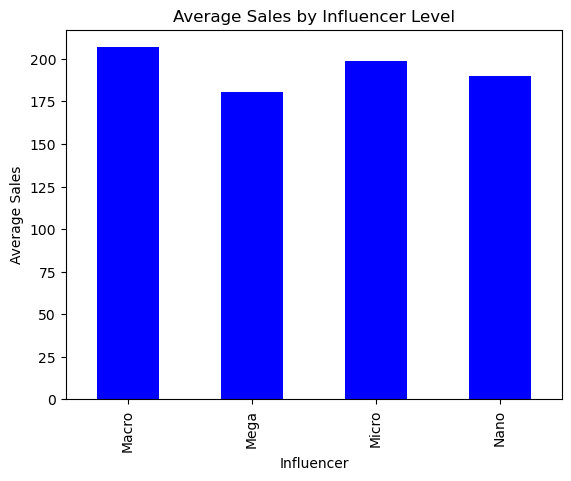

In [10]:
df.groupby('Influencer')['Sales'].mean().plot(kind='bar',color='blue')
plt.title('Average Sales by Influencer Level')
plt.ylabel('Average Sales')
plt.show()


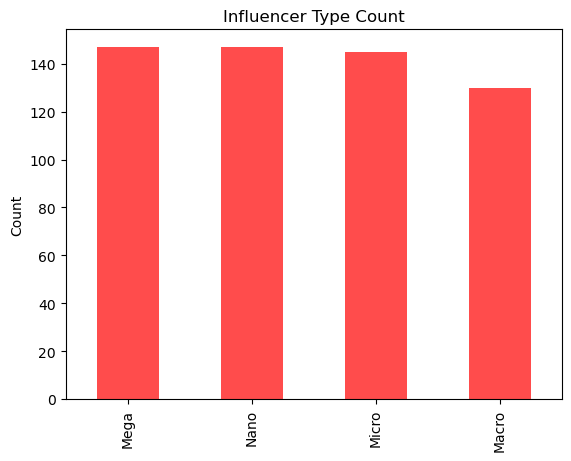

In [11]:
df['Influencer'].value_counts().plot(kind='bar', color='red', alpha=0.7)
plt.title('Influencer Type Count')
plt.ylabel('Count')
plt.show()


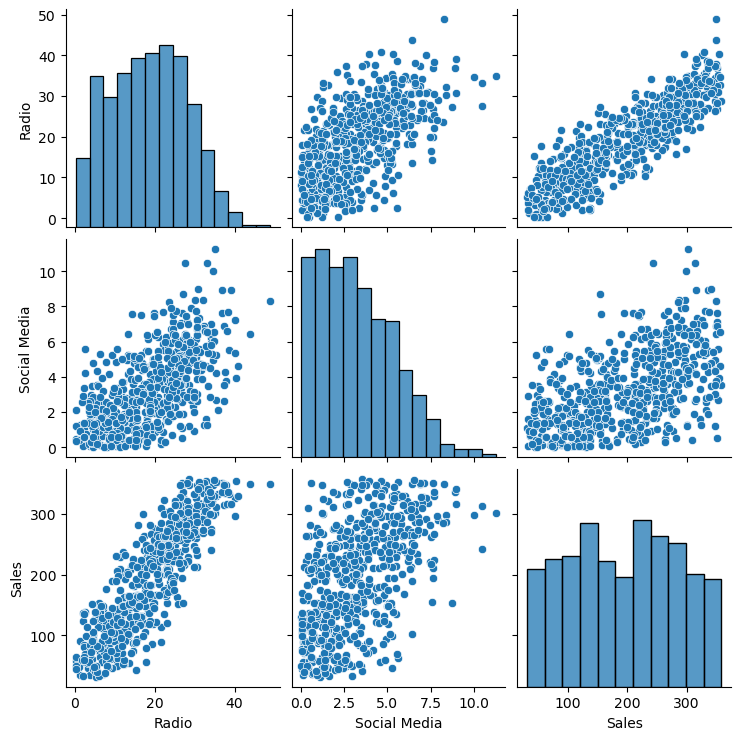

In [12]:
sns.pairplot(df)

In [13]:
df=df.rename(columns={'Social Media':'Social_Media'})

## Correlation Analysis
* Radio has a strong positive correlation with Sales (0.87).
* Social Media has a moderate positive correlation with Sales (0.53).


In [14]:
correlation_matrix = df[['Radio', 'Social_Media', 'Sales']].corr()
print(correlation_matrix)


                 Radio  Social_Media     Sales
Radio         1.000000      0.611509  0.870158
Social_Media  0.611509      1.000000  0.531834
Sales         0.870158      0.531834  1.000000


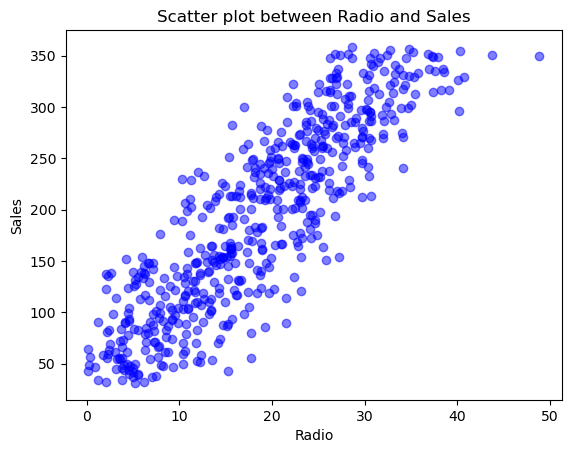

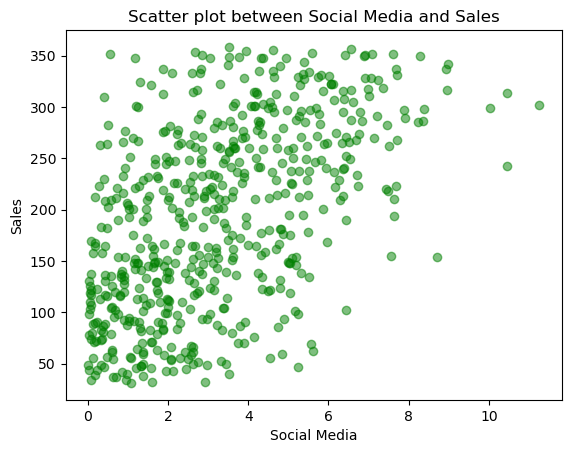

In [15]:
# Scatter plot between Radio and Sales
plt.scatter(df['Radio'], df['Sales'], color='blue', alpha=0.5)
plt.title('Scatter plot between Radio and Sales')
plt.xlabel('Radio')
plt.ylabel('Sales')
plt.show()

# Scatter plot between Social Media and Sales
plt.scatter(df['Social_Media'], df['Sales'], color='green', alpha=0.5)
plt.title('Scatter plot between Social Media and Sales')
plt.xlabel('Social Media')
plt.ylabel('Sales')
plt.show()


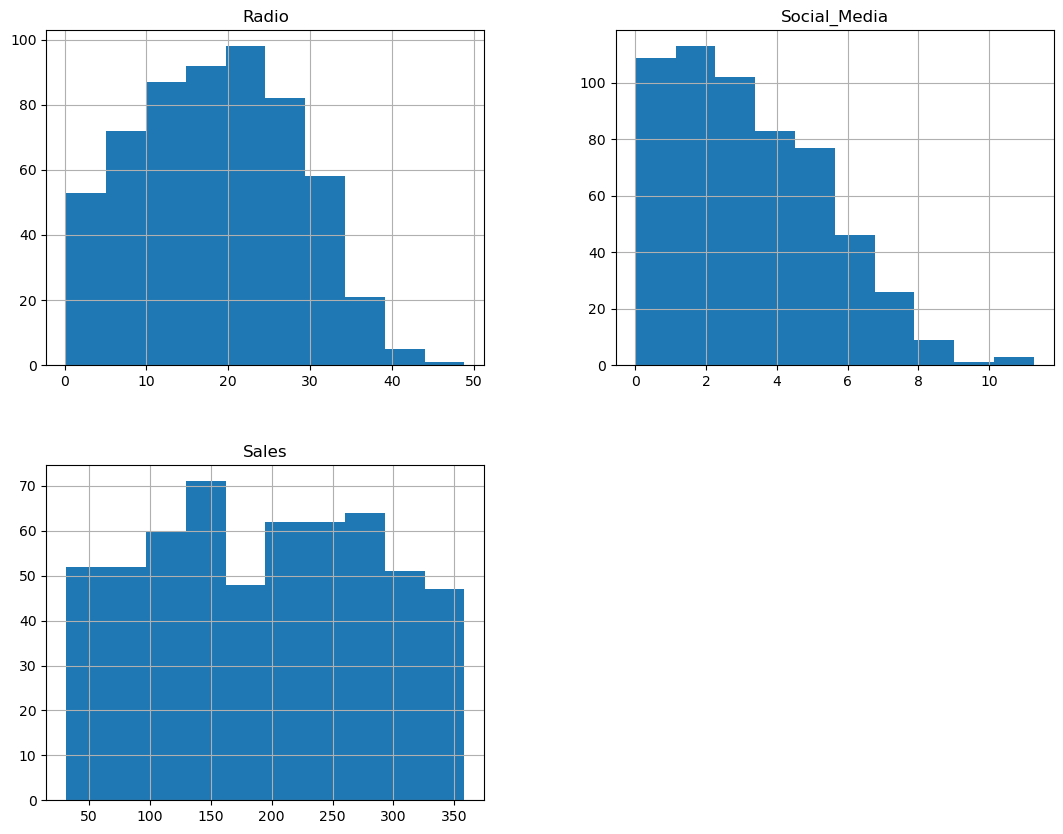

In [16]:
df.hist(figsize = (13,10))
plt.show()


In [17]:
df_Influencer=pd.get_dummies(df['Influencer'],prefix='Influencer')
df_TV=pd.get_dummies(df['TV'],prefix='Tv')


In [18]:
df=pd.concat([df,df_Influencer],axis=1)

df=pd.concat([df,df_TV],axis=1)

In [25]:
df = df.drop(['Influencer', 'TV'], axis=1)


In [19]:
df = df.drop(['Influencer_Nano', 'Tv_Medium'], axis=1)


In [26]:
df

,Radio,Social_Media,Sales,Influencer_Macro,Influencer_Mega,Influencer_Micro,Tv_High,Tv_Low
0,1.218354,1.270444,90.054222,0,0,1,0,1
1,14.949791,0.274451,222.741668,1,0,0,0,0
2,10.377258,0.061984,102.774790,0,1,0,0,1
3,26.469274,7.070945,328.239378,0,0,1,1,0
4,36.876302,7.618605,351.807328,0,1,0,1,0
...,...,...,...,...,...,...,...,...
567,28.210738,4.373466,302.887998,0,0,1,1,0
568,23.578661,2.856657,232.555023,0,1,0,0,0
569,9.169824,0.067279,73.888838,0,0,0,0,1
570,11.563403,1.727947,121.949570,0,0,0,0,1


In [54]:
X=df.drop('Sales',axis=1)
Y=df['Sales']

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state= 35)


In [56]:
my_model = LinearRegression()
my_model.fit(X_train, y_train)


LinearRegression()

In [57]:
train_score = my_model.score(X_train, y_train)
test_score = my_model.score(X_test, y_test)


In [58]:
print("Training score:", train_score)
print("Testing score:", test_score)
my_model.score(X_test,y_test)


Training score: 0.9058984682806783
Testing score: 0.9010818132470924


0.9010818132470924

In [59]:
y_pred = my_model.predict(X_test)
y_pred

array([270.5279482 ,  72.85240718, 314.37136435, 103.5664891 ,
       164.68013852, 196.20478867, 197.27027094, 328.20094879,
        90.94045437, 295.25406292, 184.08851126, 171.69245989,
       102.26718544, 305.91188738,  67.97140887, 303.7472198 ,
       194.1540062 , 178.78796343, 209.5200175 , 193.45812838,
       284.24484141, 331.95668064, 279.23834309, 287.14080725,
        71.75182143,  87.56194112, 306.26181546, 324.51585001,
       314.34725895, 304.37491093, 187.2313737 , 294.67279444,
       275.8486133 ,  96.24125144,  85.04111171, 187.7565559 ,
       285.98270373, 294.9914038 , 124.51500222, 104.14874396,
       309.67013736,  84.36815148, 192.81650767, 210.39575905,
        75.97538468,  78.55907432, 292.40769342, 218.96200063,
       295.58774815,  78.94128121,  88.50104662, 196.26617059,
       115.82677727, 320.95762816, 202.35446339, 175.13845248,
        76.90178555, 183.37351092,  70.79259272, 333.66380911,
        89.04826394, 202.86626239, 188.61166716,  92.02

In [60]:
df_different = pd.DataFrame({"y_test" : y_test, "y_pred" 
                   : y_pred, "diff between y_pred and y_test" :abs(y_pred-y_test)})
df_different


,y_test,y_pred,diff between y_pred and y_test
97,248.802379,270.527948,21.725569
540,63.176075,72.852407,9.676332
486,304.419999,314.371364,9.951365
116,136.556180,103.566489,32.989690
142,176.128246,164.680139,11.448108
...,...,...,...
280,200.090882,206.079490,5.988608
539,138.856211,82.185628,56.670583
234,61.219108,93.099017,31.879910
410,293.495505,290.477327,3.018178


In [132]:
df_different.describe().T

,count,mean,std,min,25%,50%,75%,max
y_test,171.0,192.275856,88.381190,31.199409,119.724099,200.090882,259.519545,350.087078
y_pred,171.0,191.476455,84.712546,66.956849,102.572638,193.587102,281.741592,343.602500
diff between y_pred and y_test,171.0,23.022726,15.476090,0.662440,10.069636,20.904440,33.790743,65.108305


In [61]:
# calculate Mean square error
mse = mean_squared_error(y_test,y_pred)
# Calculate R square vale
rsq = r2_score(y_test,y_pred)
print('mean squared error :',mse)
print('r square :',rsq)


mean squared error : 768.1546210540708
r square : 0.9010818132470924


In [62]:
RMSE = np.sqrt(mse)
RMSE


27.71560248405347

In [63]:
print('intercept:',my_model.intercept_)
print('coef',my_model.coef_).

intercept: 140.90949329889085
coef [  2.92583231  -0.16728726   3.34901314   0.88330828   1.55583239
  75.73070165 -76.49586736]


In [64]:
import pandas as pd

# Create a new DataFrame with the given data
new_data = pd.DataFrame({
    'Radio': [14.949791],
    'Social_Media': [0.274451],
    'Influencer_Macro': [1],
    'Influencer_Mega': [0],
    'Influencer_Micro': [0],
    'Tv_High': [0],
    'Tv_Low': [0]
})

# Use the trained model to make a prediction
predicted_sales = my_model.predict(new_data)

print("Predicted Sales upper_limit:", predicted_sales[0]+RMSE)

print("Predicted Sales lower_limit:", predicted_sales[0]-RMSE)


Predicted Sales upper_limit: 215.66877829019015
Predicted Sales lower_limit: 160.2375733220832


## Linear Regression
* Backward elimination was used to find the most significant predictors which turned out to be `Radio`, `TV_High`, and `Tv_Low`.
* The model explained 90.4% of the variance in Sales (R-squared = 0.904).


In [66]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
X=sm.add_constant(X)
model=sm.OLS(Y,X).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     761.7
Date:                Tue, 22 Aug 2023   Prob (F-statistic):          1.02e-281
Time:                        02:04:20   Log-Likelihood:                -2700.3
No. Observations:                 569   AIC:                             5417.
Df Residuals:                     561   BIC:                             5451.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              143.4513      5.063     28.335      0.000     133.507     153.396
Radio                2.9630      0.235     12.593      0.000       2.501       3.425
Social_Media        -0.5830      0.678     -0.860      0.390      -1.914       0.748
Influencer_Macro     3.0427      3.387      0.898      0.369      -3.610       9.695
Influencer_Mega     -0.6494      3.277     -0.198      0.843      -7.087       5.788
Influencer_Micro     1.9806      3.288      0.602      0.547      -4.478       8.439
Tv_High             73.5804      3.604     20.414      0.000      66.501      80.660
Tv_Low             -78.3054      3.570    -21.935      0.000     -85.317     -71.294
==============================================================================
Omnibus:                       37.610   Durbin-Watson:                   1.948
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               14.296
Skew:                           0.080   Prob(JB):                     0.000786
Kurtosis:                       2.240   Cond. No.                         113.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [68]:
X=X.drop(['Influencer_Mega'],axis=1)
model=sm.OLS(Y,X).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     890.1
Date:                Tue, 22 Aug 2023   Prob (F-statistic):          3.34e-283
Time:                        02:07:40   Log-Likelihood:                -2700.3
No. Observations:                 569   AIC:                             5415.
Df Residuals:                     562   BIC:                             5445.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              143.1153      4.766     30.027      0.000     133.754     152.477
Radio                2.9647      0.235     12.619      0.000       2.503       3.426
Social_Media        -0.5849      0.677     -0.864      0.388      -1.915       0.745
Influencer_Macro     3.3660      2.966      1.135      0.257      -2.459       9.191
Influencer_Micro     2.3027      2.856      0.806      0.420      -3.307       7.913
Tv_High             73.5556      3.599     20.437      0.000      66.486      80.625
Tv_Low             -78.3197      3.566    -21.963      0.000     -85.324     -71.315
==============================================================================
Omnibus:                       37.445   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               14.271
Skew:                           0.081   Prob(JB):                     0.000796
Kurtosis:                       2.241   Cond. No.                         105.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [69]:
X=X.drop(['Influencer_Micro'],axis=1)
model=sm.OLS(Y,X).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     1069.
Date:                Tue, 22 Aug 2023   Prob (F-statistic):          1.34e-284
Time:                        02:08:07   Log-Likelihood:                -2700.6
No. Observations:                 569   AIC:                             5413.
Df Residuals:                     563   BIC:                             5439.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              143.9278      4.657     30.906      0.000     134.781     153.075
Radio                2.9653      0.235     12.625      0.000       2.504       3.427
Social_Media        -0.5733      0.677     -0.847      0.397      -1.902       0.756
Influencer_Macro     2.5971      2.807      0.925      0.355      -2.917       8.111
Tv_High             73.4434      3.595     20.428      0.000      66.382      80.505
Tv_Low             -78.5055      3.557    -22.068      0.000     -85.493     -71.518
==============================================================================
Omnibus:                       37.402   Durbin-Watson:                   1.952
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               14.333
Skew:                           0.087   Prob(JB):                     0.000772
Kurtosis:                       2.242   Cond. No.                         102.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [70]:
X=X.drop(['Social_Media'],axis=1)
model=sm.OLS(Y,X).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     1336.
Date:                Tue, 22 Aug 2023   Prob (F-statistic):          4.94e-286
Time:                        02:08:36   Log-Likelihood:                -2701.0
No. Observations:                 569   AIC:                             5412.
Df Residuals:                     564   BIC:                             5434.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              143.5365      4.633     30.982      0.000     134.437     152.636
Radio                2.8892      0.217     13.316      0.000       2.463       3.315
Influencer_Macro     2.5160      2.805      0.897      0.370      -2.993       8.025
Tv_High             73.3313      3.592     20.415      0.000      66.276      80.387
Tv_Low             -78.5034      3.557    -22.073      0.000     -85.489     -71.518
==============================================================================
Omnibus:                       38.646   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               14.554
Skew:                           0.084   Prob(JB):                     0.000691
Kurtosis:                       2.235   Cond. No.                         101.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [71]:
X=X.drop(['Influencer_Macro'],axis=1)
model=sm.OLS(Y,X).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     1782.
Date:                Tue, 22 Aug 2023   Prob (F-statistic):          1.61e-287
Time:                        02:09:06   Log-Likelihood:                -2701.4
No. Observations:                 569   AIC:                             5411.
Df Residuals:                     565   BIC:                             5428.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        144.1532      4.581     31.469      0.000     135.156     153.151
Radio          2.8864      0.217     13.306      0.000       2.460       3.312
Tv_High       73.4835      3.587     20.484      0.000      66.437      80.530
Tv_Low       -78.6062      3.554    -22.117      0.000     -85.587     -71.625
==============================================================================
Omnibus:                       35.219   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               13.863
Skew:                           0.087   Prob(JB):                     0.000976
Kurtosis:                       2.255   Cond. No.                         99.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [87]:
import statsmodels.api as sm

def backward_elimination(data, target, significance_level=0.05):
    predictors = list(data.columns)
    while len(predictors) > 0:
        x_with_const = sm.add_constant(data[predictors])
        model = sm.OLS(target, x_with_const).fit()
        max_p_value = max(model.pvalues[1:])  # Exclude intercept
        if max_p_value > significance_level:
            excluded_variable = model.pvalues.idxmax()
            predictors.remove(excluded_variable)
        else:
            break

    return predictors, model

significant_predictors, final_model = backward_elimination(x, y)

print("Significant predictors after backward elimination:", significant_predictors)
print(final_model.summary())


Significant predictors after backward elimination: ['const', 'Radio', 'Tv_High', 'Tv_Low']
                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     1782.
Date:                Tue, 22 Aug 2023   Prob (F-statistic):          1.61e-287
Time:                        02:36:00   Log-Likelihood:                -2701.4
No. Observations:                 569   AIC:                             5411.
Df Residuals:                     565   BIC:                             5428.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

## Assumptions Check for Linear Regression
### 1. Linearity
The scatter plot of residuals vs. fitted values should show a random pattern. Any evident shape or pattern suggests non-linearity.

### 2. Independence
The Durbin-Watson statistic is close to 2, which indicates no autocorrelation.

### 3. Normality
The Q-Q plot and histogram provide visual checks for the normality of residuals. They should ideally form a straight line in the Q-Q plot and look like a bell curve in the histogram.

### 4. Homoscedasticity
The residuals should exhibit constant variance against fitted values. Breusch-Pagan test can be applied for statistical confirmation. P-values < 0.05 suggest heteroscedasticity.


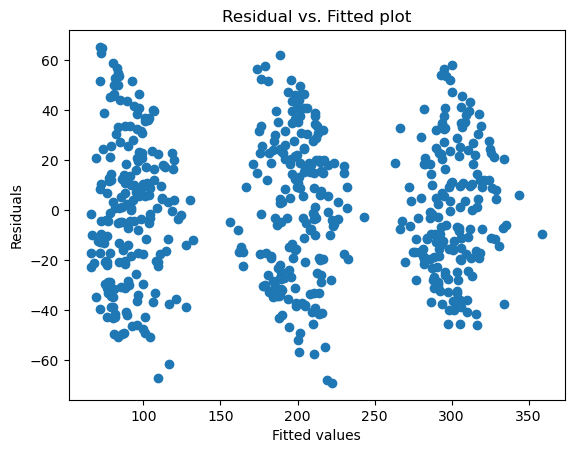

Durbin-Watson statistic: 1.9492773627757962


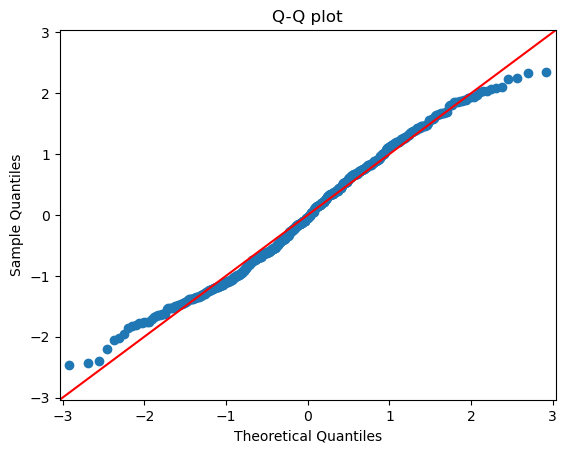

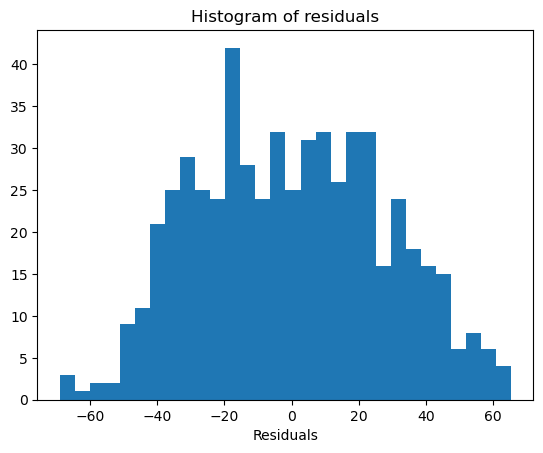

{'LM Statistic': 10.117030912644378, 'LM-Test p-value': 0.017597081975982292, 'F-Statistic': 3.4092542814931757, 'F-Test p-value': 0.017371022987110983}


In [133]:
# Fit the regression model
model = sm.OLS(y, sm.add_constant(X)).fit()

# 1. Check for Linearity
# Residual vs. Fitted plot
fitted_values = model.predict()
residuals = model.resid

plt.scatter(fitted_values, residuals)
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residual vs. Fitted plot")
plt.show()

# 2. Check for Independence of residuals
# Durbin-Watson test
durbin_watson_statistic = sm.stats.durbin_watson(model.resid)
print(f"Durbin-Watson statistic: {durbin_watson_statistic}")
# Values close to 2 indicate no autocorrelation. Values < 1 or > 3 are cause for concern.

# 3. Check for Normality of residuals
# Q-Q plot
sm.qqplot(residuals, line="45", fit=True)
plt.title("Q-Q plot")
plt.show()

# Histogram of residuals
plt.hist(residuals, bins=30)
plt.xlabel("Residuals")
plt.title("Histogram of residuals")
plt.show()

# 4. Check for Homoscedasticity
# Residual vs. Fitted plot (similar to linearity check)

# Additional test: Breusch-Pagan test
bp_test = sm.stats.diagnostic.het_breuschpagan(residuals, model.model.exog)
labels = ["LM Statistic", "LM-Test p-value", "F-Statistic", "F-Test p-value"]
print(dict(zip(labels, bp_test)))
# p-values < 0.05 indicate heteroscedasticity


In [75]:
new_data_corrected = pd.DataFrame({
    'Radio': [14.949791],
    'Social_Media': [0],
    'Influencer_Macro': [0],
    'Influencer_Mega': [0],
    'Influencer_Micro': [0],
    'Tv_High': [0],
    'Tv_Low': [0]
})

# Prediction using the sklearn model:
predicted_sales_sklearn = my_model.predict(new_data_corrected)
upper_limit_sklearn = predicted_sales_sklearn[0] + RMSE
lower_limit_sklearn = predicted_sales_sklearn[0] - RMSE

print("Predicted Sales (using sklearn model) upper_limit:", upper_limit_sklearn)
print("Predicted Sales (using sklearn model) lower_limit:", lower_limit_sklearn)


Predicted Sales (using sklearn model) upper_limit: 212.36567730610466
Predicted Sales (using sklearn model) lower_limit: 156.9344723379977


In [76]:
XX=df.drop(['Influencer_Macro','Influencer_Mega','Influencer_Micro','Social_Media','Sales'],axis=1)
YY=df['Sales']

In [78]:
X_train, X_test, y_train, y_test = train_test_split(XX, YY, test_size=0.3, random_state= 35)
my_model = LinearRegression()
my_model.fit(X_train, y_train)
train_score = my_model.score(X_train, y_train)
test_score = my_model.score(X_test, y_test)
print("Training score:", train_score)
print("Testing score:", test_score)
my_model.score(X_test,y_test)



Training score: 0.9057167429645722
Testing score: 0.9006790817946171


0.9006790817946171

In [79]:
# calculate Mean square error
mse = mean_squared_error(y_test,y_pred)
# Calculate R square vale
rsq = r2_score(y_test,y_pred)
print('mean squared error :',mse)
print('r square :',rsq)


mean squared error : 768.1546210540708
r square : 0.9010818132470924


In [80]:
RMSE = np.sqrt(mse)
RMSE


27.71560248405347

In [81]:
print('intercept:',my_model.intercept_)
print('coef',my_model.coef_)

intercept: 142.27357457348887
coef [  2.89939938  75.82081163 -76.61272152]


In [113]:
new_data = pd.DataFrame({
    'Radio': [1.218354],
    'Tv_High': [0],
    'Tv_Low': [1]
})

# Prediction using the sklearn model:
predicted_sales_sklearn = my_model.predict(new_data)
upper_limit_sklearn = predicted_sales_sklearn[0] + 28
lower_limit_sklearn = predicted_sales_sklearn[0] - 28

print("Predicted Sales (using sklearn model) upper_limit:", upper_limit_sklearn)
print("Predicted Sales (using sklearn model) lower_limit:", lower_limit_sklearn)


Predicted Sales (using sklearn model) upper_limit: 97.19334789396127
Predicted Sales (using sklearn model) lower_limit: 41.193347893961274


In [101]:
x=144.1532 + 2.8864*14.949791 + 73.4835*0 - 78.6062*0


In [106]:
x

187.3042767424

In [102]:
z=x+RMSE

In [104]:
z

215.01987922645347

In [110]:
(142.2736 + 2.8994*28.210738 + 75.8208*1 - 76.6127*0)-RMSE

272.1730112731465

# Business Recommendations from Data Analysis

## Executive Summary
Our data analysis has provided crucial insights into how different marketing strategies impact sales. This report offers recommendations to enhance marketing effectiveness and optimize budget allocation.

## Key Findings:
1. **TV Advertisements**: Sales seem to respond differently to varying levels of TV ad exposure.
2. **Influencer Type**: Using `Mega` influencers yields the most frequent sales, but average sales are higher with `Micro` influencers.
3. **Radio Ads**: They have a strong positive relationship with sales.
4. **Social Media**: There's a moderate positive impact on sales, but it's still significant.

## Recommendations:

### 1. Optimize TV Ad Spend
- **Action**: Increase spending on TV ad slots that fall under the `High` category. Limit or re-evaluate the effectiveness of `Low` TV ad slots.
- **Rationale**: The data indicates higher sales when TV exposure is at a `High` level compared to a `Low` level.

### 2. Diversify Influencer Partnerships
- **Action**: Continue collaborating with `Mega` influencers for brand awareness. However, allocate more budget for partnerships with `Micro` influencers.
- **Rationale**: `Micro` influencers tend to drive higher average sales, likely due to their niche and engaged audience.

### 3. Enhance Radio Advertisements
- **Action**: Allocate a larger portion of the marketing budget to radio ads, ensuring quality and timing to target peak listening times.
- **Rationale**: Radio ads have shown a strong positive correlation with sales, indicating a high return on investment.

### 4. Re-Evaluate Social Media Strategies
- **Action**: Though social media has a moderate impact on sales, consider optimizing ad creatives, targeting strategies, and campaigns to improve its effectiveness.
- **Rationale**: As digital platforms continue to evolve, staying updated and agile with social media strategies is crucial.

1. **Influencer Type**:
    - `Mega`, `Micro`, and other categories of influencers do not show a statistically significant difference in impacting sales.
    - The variance in sales can be attributed to other factors, rather than the type of influencer used.

2. **Social Media**:
    - Despite the vast reach and frequent user engagement on our social media platforms, they don't appear to significantly influence sales numbers.
    - Ad exposure on social media platforms, based on current data, does not translate directly to increased sales.

## Implications:

### 1. Influencer Marketing Strategy:
- **Re-evaluation Needed**: It might be essential to re-evaluate our collaboration terms or the types of influencers we're partnering with.
- **Diversification**: Consider diversifying influencer partnerships to determine if there's a niche or category previously unexplored that could be impactful.

### 2. Social Media Marketing:
- **Content Review**: The content and design of social media ads should be reviewed. A more engaging or differently targeted approach might yield better sales results.
- **Platform Analysis**: All social media platforms are not equal. It might be useful to analyze individual platform performance to determine if our marketing efforts are better suited to one over another.



